# TP 2

In [1]:
import numpy as np
import random as r
import numpy.random as nr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Init
np.random.seed(0)
r.seed(0)
theta = [-2,-1,0,1,2]
X = np.random.multivariate_normal(np.zeros(5), np.eye(5), size=10000)
eps = np.random.normal(0, 1, 10000)
y = X @ theta + eps

In [3]:
# Estimating theta using the stochastic gradient descent algorithm
theta_hat = stochastic_gradient(X, y, 2/3, X.shape[0])
plt.plot(theta_hat)
print("Estimated Theta:")
print(theta_hat[-1])

NameError: name 'stochastic_gradient' is not defined

Mean Squared Error:
0.003883312252219894


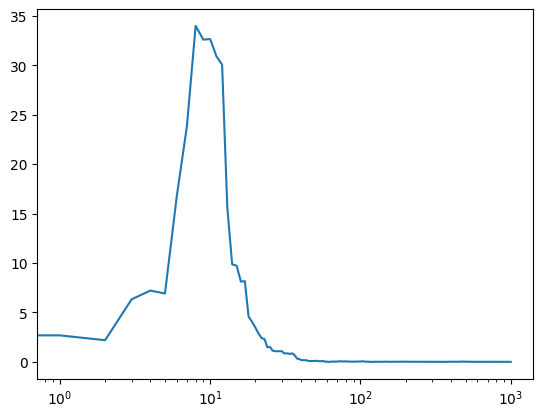

In [ ]:
def mean_squared_error(theta, theta_hat):
    return np.mean((theta - theta_hat)**2)

# Calculating the mean squared error
print("Mean Squared Error:")
print(mean_squared_error(theta, theta_hat[-1]))

# Plotting the evolution of the mean squared error over time
mse = [mean_squared_error(theta, t) for t in theta_hat]
plt.plot(mse)
plt.xscale("log")

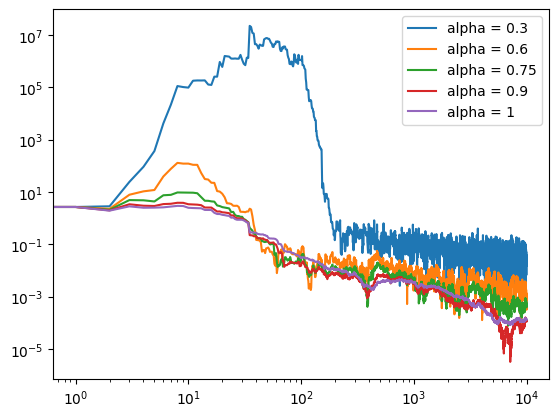

In [ ]:
# Plotting for different values of alpha
alphas = [0.3, 0.6, 0.75, 0.90, 1]

for a in alphas:
    theta_hat = stochastic_gradient(X, y, a, 10000)
    mse = [mean_squared_error(theta, t) for t in theta_hat]
    plt.plot(mse, label=f"alpha = {a}")
    
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()


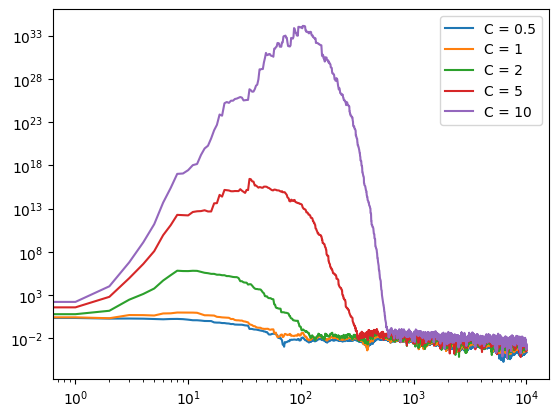

In [ ]:
# Plotting for different values of C
alpha = 0.75
C = [0.5, 1, 2, 5, 10]

for c in C:
    theta_hat = stochastic_gradient(X, y, alpha, 10000, C = c)
    mse = [mean_squared_error(theta, t) for t in theta_hat]
    plt.plot(mse, label=f"C = {c}")

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Evolution of Mean Squared Error Over 50 Iterations')

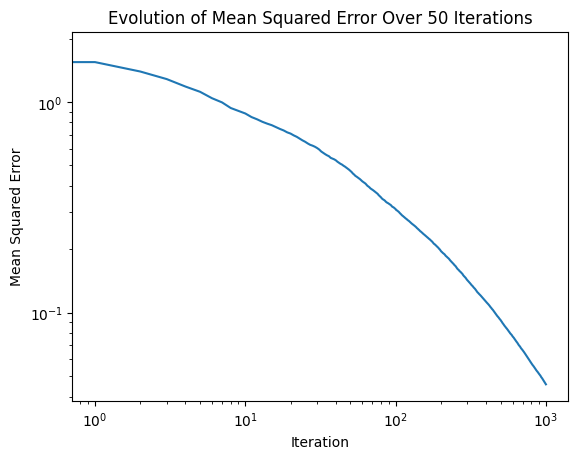

In [ ]:
# Evolution of mean mse over 50 samples
mse = []
for i in range(50):
    X = np.random.multivariate_normal(np.zeros(5), np.eye(5), size=10000)
    eps = np.random.normal(0, 1, 10000)
    y = X @ theta + eps
    theta_hat = stochastic_gradient(X, y, alpha, 1000)
    mse.append([mean_squared_error(theta, t) for t in theta_hat])

# Plotting evolution of MSE over 50 iterations
mse = np.array(mse)
plt.plot(mse.mean(axis=0))
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.xscale("log")
plt.yscale("log")
plt.title('Evolution of Mean Squared Error Over 50 Iterations')

In [ ]:
# Now for the logit regression

# Init
np.random.seed(0)
r.seed(0)
theta = [-2,-1,0,1,2]
X = np.random.multivariate_normal(np.zeros(5), np.eye(5), size=100000)
# eps = np.random.normal(0, 1, 100000)
# y = X @ theta + eps
# y = (y > 0).astype(int)
# logit regression
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y = np.random.binomial(1, sigmoid(X @ theta))
# y = np.array([1 if r.random() < sigmoid(X[i] @ theta) else 0 for i in range(X.shape[0])])
print(sigmoid(X@theta))
print(len(y[y==1]))


def stochastic_gradient_logit(X, y, alpha, T, theta_init = np.random.rand(5), C = 1):
    n = X.shape[0]
    theta = [theta_init]
    gamma = np.array([C/(i**alpha) for i in range(1, T+1)])
    for t in range(T):
        # i = r.randint(0, n-1)
        theta.append(theta[-1] - gamma[t] * X[t] * (sigmoid(X[t] @ theta[-1]) - y[t]))
    return theta

[0.8857198  0.84844356 0.32454569 ... 0.19704587 0.99500862 0.00250095]
50046


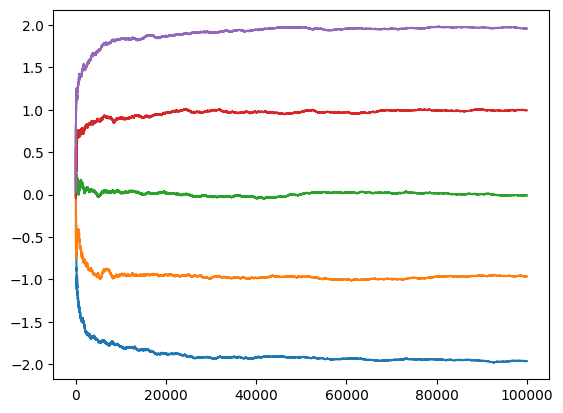

In [ ]:
# Estimating theta using the stochastic gradient descent algorithm
theta_hat = stochastic_gradient_logit(X, y, 2/3, 100000)
plt.plot(theta_hat)


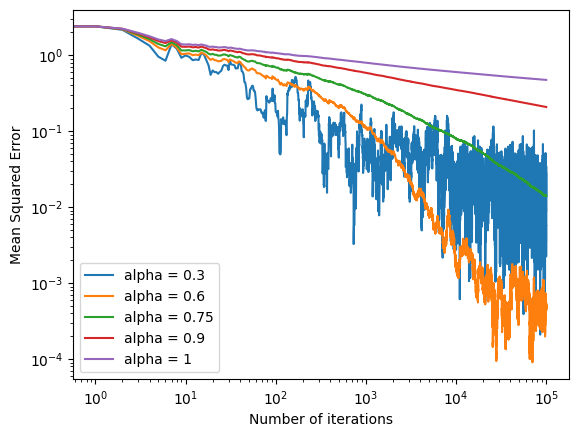

In [ ]:
# Plotting logit mse for different values of alpha
alphas = [0.3, 0.6, 0.75, 0.90, 1]
logits_mse = []
for alpha in alphas:
    theta_hat = stochastic_gradient_logit(X, y, alpha, 100000)
    logits_mse.append([mean_squared_error(theta, t) for t in theta_hat])
    plt.plot(logits_mse[-1], label=f"alpha = {alpha}")
plt.xlabel("Number of iterations")
plt.ylabel("Mean Squared Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

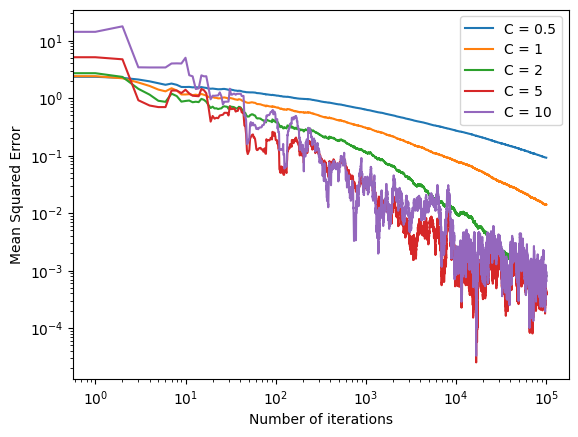

In [ ]:
# Plotting logit mse for different values of C
C = [0.5, 1, 2, 5, 10]
logits_mse = []
for c in C:
    theta_hat = stochastic_gradient_logit(X, y, 0.75, 100000, C = c)
    logits_mse.append([mean_squared_error(theta, t) for t in theta_hat])
    plt.plot(logits_mse[-1], label=f"C = {c}")
plt.xlabel("Number of iterations")
plt.ylabel("Mean Squared Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Evolution of Mean Squared Error Over 50 Iterations')

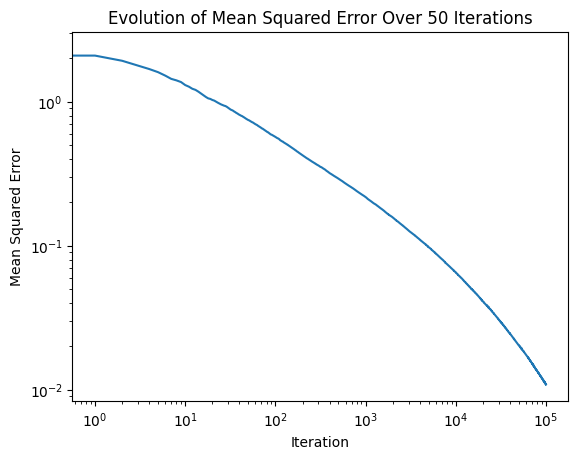

In [ ]:
# Evolution of logit mean mse over 50 samples
logit_mse = []
alpha = 0.75
C = 1
for i in range(50):
    X = np.random.multivariate_normal(np.zeros(5), np.eye(5), size=100000)
    y = np.random.binomial(1, sigmoid(X @ theta))
    theta_hat = stochastic_gradient_logit(X, y, alpha, 100000)
    logit_mse.append([mean_squared_error(theta, t) for t in theta_hat])

# Plotting evolution of MSE over 50 iterations
mse = np.array(logit_mse)
plt.plot(mse.mean(axis=0))
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.xscale("log")
plt.yscale("log")
plt.title("Evolution of Mean Squared Error Over 50 Iterations")

In [ ]:
# Using Polyak-Rupert averaging
z = np.random.normal(5)
def stochastic_gradient_logit_polyak_rupert(X, y, alpha, T, theta_init = theta + (z/np.linalg.norm(z)), C = 1):
    n = X.shape[0]
    theta = [theta_init]
    gamma = np.array([C/(i**alpha) for i in range(1, T+1)])
    theta_avg = [theta_init]
    for t in range(T):
        # i = r.randint(0, n-1)
        theta.append(theta_avg[-1] - gamma[t] * X[t] * (sigmoid(X[t] @ theta[-1]) - y[t]))
        theta_avg = (t*theta_avg[-1] + theta[-1])/(t+1)
    return theta, theta_avg


def stochastic_gradient_polyak_rupert(
    X, y, alpha, T, theta_init=theta + (z / np.linalg.norm(z)), C=1
):
    n = X.shape[0]
    theta = [theta_init]
    gamma = np.array([C / (i**alpha) for i in range(1, T + 1)])
    theta_avg = [theta_init]
    for t in range(T):
        theta.append(theta_avg[-1] - gamma[t] * X[t] * (X[t] @ theta_avg[-1] - y[t]))
        theta_avg.append((t * theta_avg[-1] + theta[-1]) / (t + 1))
    return theta, theta_avg

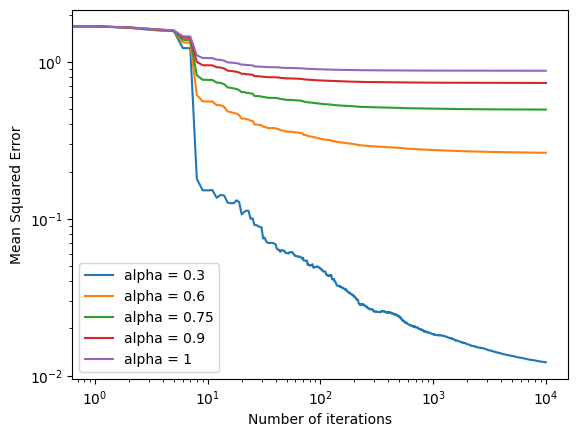

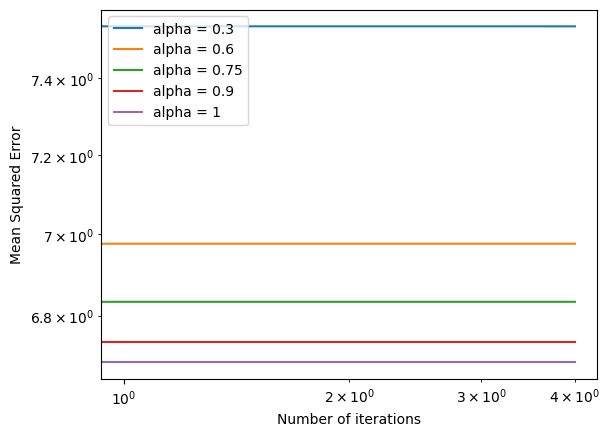

In [ ]:
alphas = [0.3, 0.6, 0.75, 0.90, 1]
theta = [-2, -1, 0, 1, 2]
X = np.random.multivariate_normal(np.zeros(5), np.eye(5), size=10000)
y = X@theta + np.random.normal(0, 1, 10000)
y_logit = np.random.binomial(1, sigmoid(X @ theta))


mse = []
for alpha in alphas:
    theta_hat, theta_avg_hat = stochastic_gradient_polyak_rupert(X, y, alpha, 10000)
    mse.append([mean_squared_error(theta, t) for t in theta_avg_hat])
    plt.plot(mse[-1], label=f"alpha = {alpha}")
plt.xlabel("Number of iterations")
plt.ylabel("Mean Squared Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

logits_mse = []
for alpha in alphas:
    theta_hat, theta_avg_hat = stochastic_gradient_logit_polyak_rupert(X, y_logit, alpha, 10000)
    logits_mse.append([mean_squared_error(theta, t) for t in theta_avg_hat])
    plt.plot(logits_mse[-1], label=f"alpha = {alpha}")
plt.xlabel("Number of iterations")
plt.ylabel("Mean Squared Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()